---


<center> <h2> <span style='color:#DF7F00'> Team 3: Heart Attack Analysis & Prediction Dataset  </span> </h2> </center>

---

In this Jupyter Notebook we will analyze [heart attack data](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset).

# Heart Attack Analysis

### INTRODUCTION

#### Context

The Challenge - Predict the presence of a heart disease in a patient by using health data provided. The prediction should be made using a classification model to predict the likelihood of a heart attack. 
Challenge will be to reduce the outcome of false negative as this would have the most negative impact in a patient possibility to obtain the treatment needed on time. 

In addition, the following questions should be answered:

* Are there any features that point higher risk of heart attacks?
* Are heart attack risks different for each gender?
* Can the data be clustered to identify different profile groups?
* Train a classification model to predict the likelihood of a heart attack.
* What are the most important features?


#### Content
The dataset can be found at:
https://archive.ics.uci.edu/ml/datasets/Heart+Disease

See also:
http://rstudio-pubs-static.s3.amazonaws.com/24341_184a58191486470cab97acdbbfe78ed5.html

And the processed Cleveland data from:
https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

Notes from the dataset give the following feature information: only 14 features used
 
* 3 (age) 
* 4 (sex) 
* 9 (cp) 
* 10 (trestbps) 
* 12 (chol) 
* 16 (fbs) 
* 19 (restecg) 
* 32 (thalach) 
* 38 (exang) 
* 40 (oldpeak) 
* 41 (slope) 
* 44 (ca) 
* 51 (thal) 
* 58 (num) (the predicted attribute) 

Complete feature documentation: 
* 3 age: age in years 
* 4 sex: sex (1 = male; 0 = female) 

* 9 cp: chest pain type 
    -- Value 1: typical angina 
    -- Value 2: atypical angina 
    -- Value 3: non-anginal pain 
    -- Value 4: asymptomatic 
* 10 trestbps: resting blood pressure (in mm Hg on admission to the hospital) 
* 12 chol: serum cholestoral in mg/dl 
* 16 fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
* 19 restecg: resting electrocardiographic results

    -- Value 0: normal 

    -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

    -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
    
* 32 thalach: maximum heart rate achieved 
* 38 exang: exercise induced angina (1 = yes; 0 = no) 
* 40 oldpeak = ST depression induced by exercise relative to rest 
* 41 slope: the slope of the peak exercise ST segment 
    -- Value 1: upsloping 
    -- Value 2: flat 
    -- Value 3: downsloping 
* 44 ca: number of major vessels (0-3) colored by flourosopy 
* 51 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect 
* 58 num: diagnosis of heart disease (angiographic disease status) 
    -- Value 0: < 50% diameter narrowing 
    -- Value 1: > 50% diameter narrowing 
    (in any major vessel: attributes 59 through 68 are vessels)

### Loading packages

In [1]:
# Core
import numpy as np
import pandas as pd
import os

# Supressing scientific notation in Pandas
#pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# print plots
%matplotlib inline 

# Machine Learning models and tools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.neural_network import MLPClassifier

## Data preparation
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import ConfusionMatrixDisplay


# To supress warnings and deprecated messages
import warnings

warnings.filterwarnings("ignore")

### Loading data

In [2]:
clear all

In [3]:
data = pd.read_csv("processed.cleveland.data", header = None, names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"],)

In [4]:
print(data.shape)
data.head(15)

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


The data contains 303 observations and 14 features. 

### Checking data types and info

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [6]:
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,303.0,NaN,NaN,NaN,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,NaN,NaN,NaN,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,NaN,NaN,NaN,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,NaN,NaN,NaN,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,NaN,NaN,NaN,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,NaN,NaN,NaN,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,NaN,NaN,NaN,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,NaN,NaN,NaN,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,NaN,NaN,NaN,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,NaN,NaN,NaN,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


From the description of the columns: sex, cp, restecg, slope, ca, thal, fbs, and exang, fit a category type better, so let's convert them to the category type. 

Columns excluded in the following list should be of categorical type:

In [7]:
data_selected = data.drop(columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'num'])
cols_selected= list(data_selected.columns)

for col in cols_selected:
    data[col] = data[col].astype("category")

for i in cols_selected:
    print(f'{i}: {data[i].unique()}')

sex: [1.0, 0.0]
Categories (2, float64): [0.0, 1.0]
cp: [1.0, 4.0, 3.0, 2.0]
Categories (4, float64): [1.0, 2.0, 3.0, 4.0]
fbs: [1.0, 0.0]
Categories (2, float64): [0.0, 1.0]
restecg: [2.0, 0.0, 1.0]
Categories (3, float64): [0.0, 1.0, 2.0]
exang: [0.0, 1.0]
Categories (2, float64): [0.0, 1.0]
slope: [3.0, 2.0, 1.0]
Categories (3, float64): [1.0, 2.0, 3.0]
ca: ['0.0', '3.0', '2.0', '1.0', '?']
Categories (5, object): ['0.0', '1.0', '2.0', '3.0', '?']
thal: ['6.0', '3.0', '7.0', '?']
Categories (4, object): ['3.0', '6.0', '7.0', '?']


Note that columns 'ca' and 'thal' contain '?'. The '?' should be replaced by the mode of the respective column.

In [8]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [9]:
#cols_missing = ['ca','thal']

for i in ['ca', 'thal']: 
    print('Index Location of ?:')
    print(data.loc[data[i]=='?', i])
    print('Total number:')
    print(data[i].value_counts())
    print('-'*10)

#data.loc[data['thal']=='?', 'thal']


Index Location of ?:
166    ?
192    ?
287    ?
302    ?
Name: ca, dtype: category
Categories (5, object): ['0.0', '1.0', '2.0', '3.0', '?']
Total number:
0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64
----------
Index Location of ?:
87     ?
266    ?
Name: thal, dtype: category
Categories (4, object): ['3.0', '6.0', '7.0', '?']
Total number:
3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64
----------


As the columns 'ca' and 'thal' are object types, the instances that have '?' can be replaced by the most frequent item in those columns. 
We see that for column 'ca' the most common item is 0, while for colum 'thal' the most common item is 3. 

Replacing missing values with most common values

In [10]:
print(data['ca'].mode())
print(data['thal'].mode())

0    0.0
Name: ca, dtype: category
Categories (5, object): ['0.0', '1.0', '2.0', '3.0', '?']
0    3.0
Name: thal, dtype: category
Categories (4, object): ['3.0', '6.0', '7.0', '?']


In the cell below we first replace '?' for NaN values and then replace those with the mode of each column:

In [11]:
data.loc[data['ca'] == '?', 'ca'] = data['ca'].mode()
data["ca"] = data["ca"].fillna(data["ca"].mode()[0])

data.loc[data['thal'] == '?', 'thal'] = data['thal'].mode()
data["thal"] = data["thal"].fillna(data["thal"].mode()[0])


In [12]:
data.isna().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

Checking duplicated values:

In [13]:
data.duplicated().sum()

0

There are no duplicated values in the data.

In [14]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,303.0,NaN,NaN,NaN,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,2.0,1.0,206.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cp,303.0,4.0,4.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trestbps,303.0,NaN,NaN,NaN,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,NaN,NaN,NaN,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,2.0,0.0,258.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restecg,303.0,3.0,0.0,151.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
thalach,303.0,NaN,NaN,NaN,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,2.0,0.0,204.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldpeak,303.0,NaN,NaN,NaN,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### Creating copy of data

In [15]:
data2 = data.copy()
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    float64 
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trestbps  303 non-null    float64 
 4   chol      303 non-null    float64 
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalach   303 non-null    float64 
 8   exang     303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slope     303 non-null    category
 11  ca        303 non-null    category
 12  thal      303 non-null    category
 13  num       303 non-null    int64   
dtypes: category(8), float64(5), int64(1)
memory usage: 17.9 KB


In [16]:
#cols_to_cat = ['sex', "cp", "restecg", "slope", "ca", "thal"]
#cols_to_bol = ["fbs", "exang"]

#for i in cols_to_cat:
#    data2[i] = data2[i].astype("category")

#for i in cols_to_bol:
#    data2[i] = data2[i].astype("boolean")

Let's regroup the 'num' column as any value >= 1 will indicate an angiographic disease status

In [17]:
data2['num'].replace([2,3,4], 1, inplace = True)
target = data2['num']
target.unique()

array([0, 1])

## Univariate analysis

Plotting all numerical features by output:

In [18]:
cols = list(data2.columns)

In [19]:
cols_num = list(data2.select_dtypes('float64'))
cols_cat = list(data2.select_dtypes(["object", "category"]))
#cols_bol = list(data2.select_dtypes(["bool"]))

#### Numerical variables

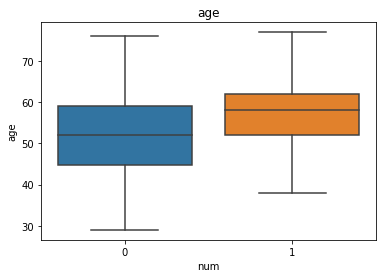

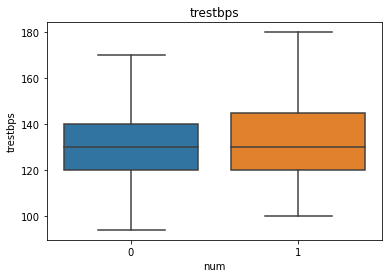

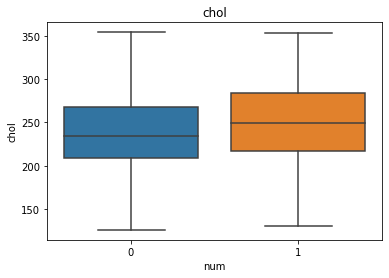

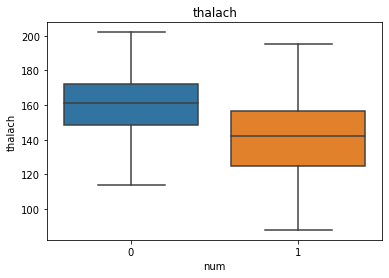

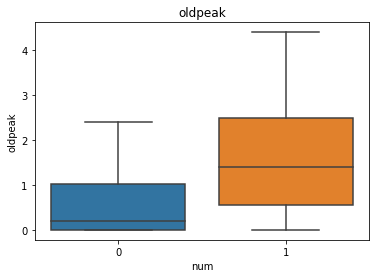

In [20]:
for i in cols_num:
    sns.boxplot(data = data2, x = "num", y = i, showfliers = False)
    plt.title(i)
    plt.show()

Certain feature might provide information as to what might lead to a num = 1 (more than 50% of diameter narrowing) from the graphs above, 

- Older age
- Achieving a lower maximum heart rate 
- Oldpeak, i.e. a higher ST depression induced by exercise relative to rest

Interestingly enough cholesterol differences didn't seem to have much of an effect

#### Categorical variables

Plotting all categorical features by output:

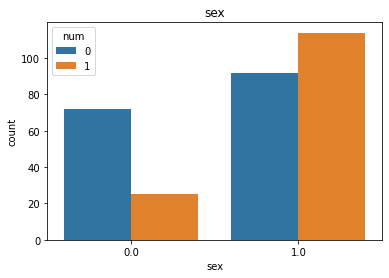

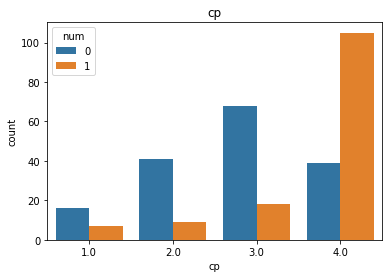

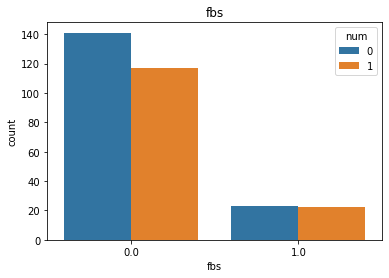

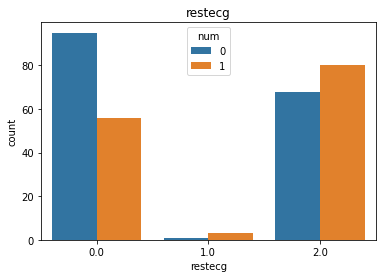

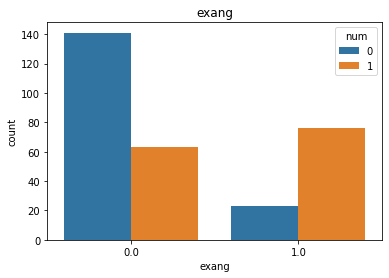

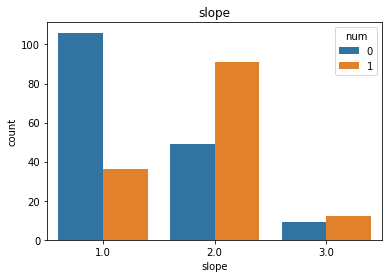

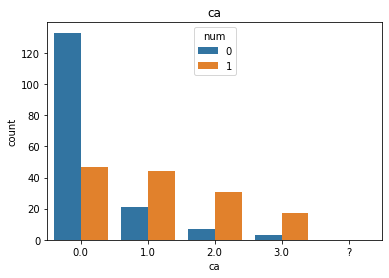

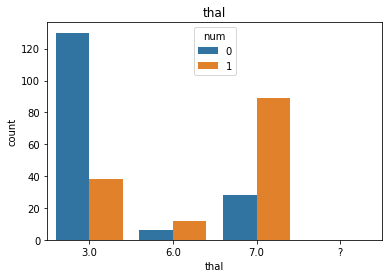

In [21]:
for i in cols_cat:
    sns.countplot(data = data2, x = i, hue = "num")
    plt.title(i)
    plt.show()

Among the categorical variables patient that showed a probability of having more than 50% of diameter narrowing were:

- males 
- patients with asymptomatic chest pain
- a larger fraction of patients with resting electrocargiographic results (showed a probably or definite left ventricular hypertrophy)
- patients with a flat slope on the peak exercise ST segment
- patient with a reversable defect (thal)
- patients with exercise induced anginas

## Multivariate analysis

#### Correlation plot

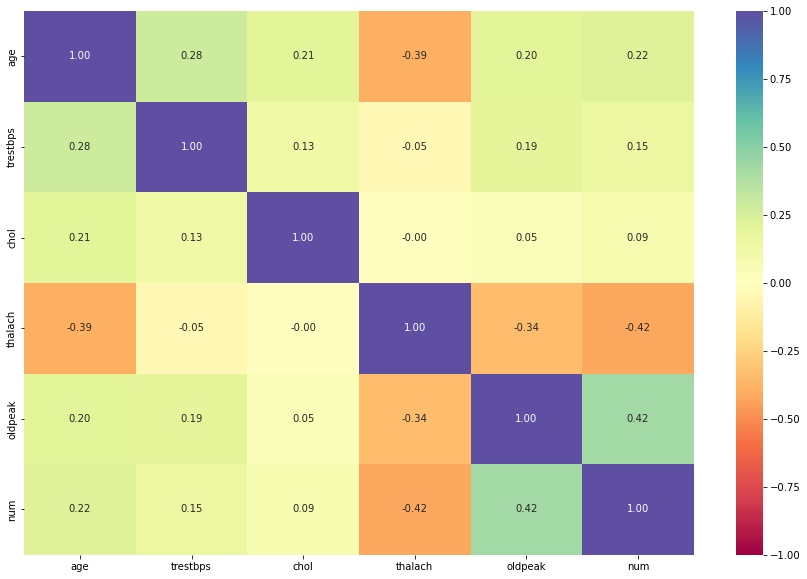

In [22]:
plt.figure(figsize = (15,10))
sns.heatmap(data = data2.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f", cmap = "Spectral");

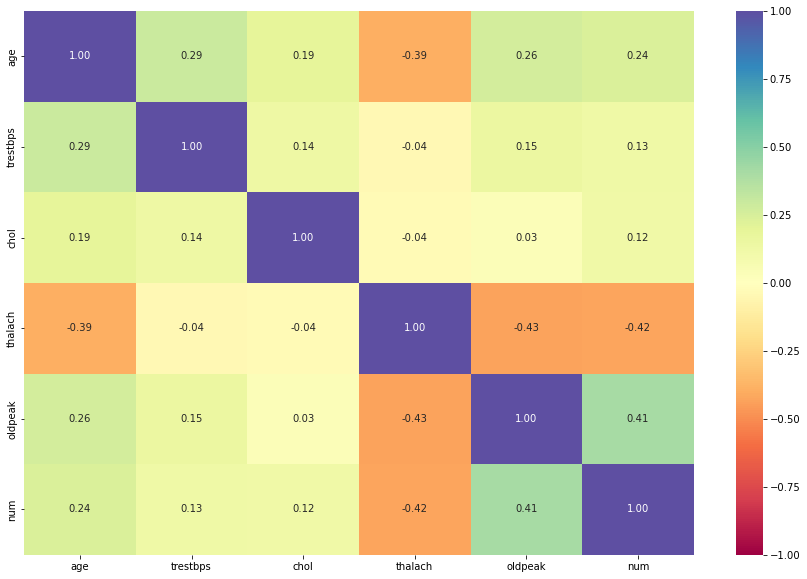

In [23]:
plt.figure(figsize = (15,10))
sns.heatmap(data = data2.corr(method = "spearman"), vmin = -1, vmax = 1, annot = True, fmt = ".2f", cmap = "Spectral");

There is a correlatio between the diagnosis of heart disease (num) and the exercise induced angina (exang) and the ST depression induced by exercise relative to rest (oldpeak). While there is an anticorrelation between num and maximum heart rate achieved (thalach)

#### Pair plot

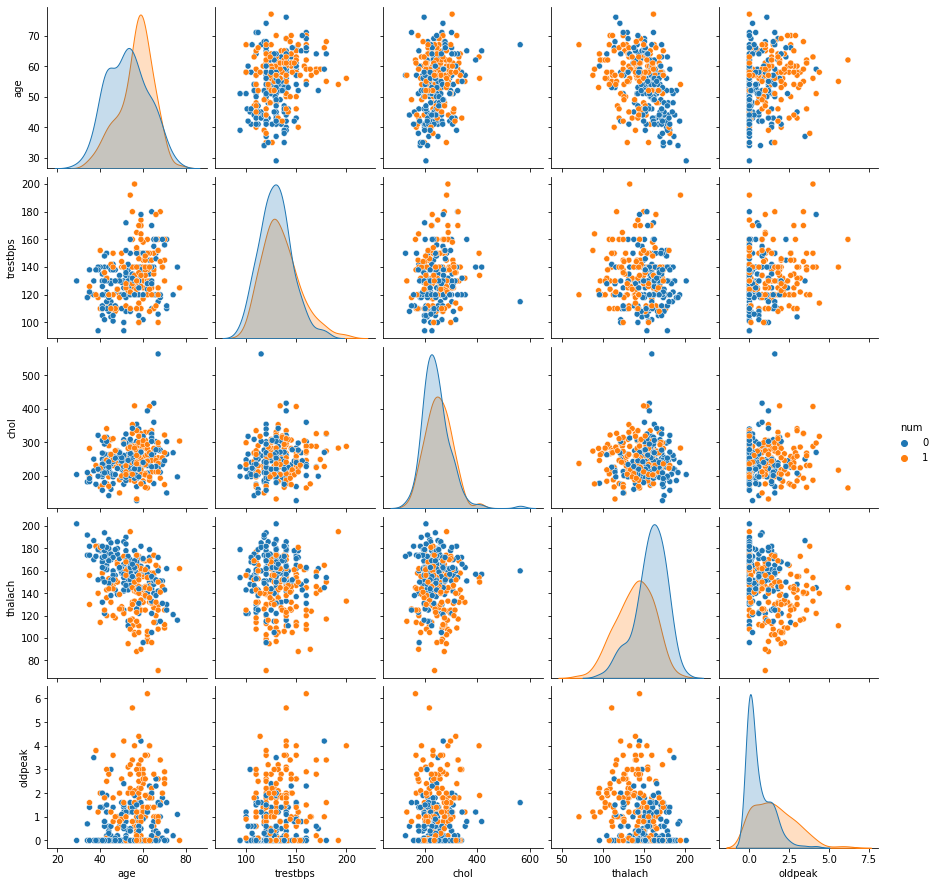

In [24]:
#data2[cols_cat]
sns.pairplot(data = data2, hue = "num")

Next, we will look for optimal hyperparameters used in different classification models. To do this we will use grid search, random search and the cross validation methods.

Models to be implmeneted
- logistic regression
- decision tree and random forest
- gradient boosting
- neural networks

## One-hot encoding

In order to do this, first let's do one-hot encoding in categorical and object variables:

In [25]:
data2 = pd.get_dummies(data2, drop_first = True)
data2.head()

,age,trestbps,chol,thalach,oldpeak,num,sex_1.0,cp_2.0,cp_3.0,cp_4.0,...,exang_1.0,slope_2.0,slope_3.0,ca_1.0,ca_2.0,ca_3.0,ca_?,thal_6.0,thal_7.0,thal_?
0,63.0,145.0,233.0,150.0,2.3,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,67.0,160.0,286.0,108.0,1.5,1,1,0,0,1,...,1,1,0,0,0,1,0,0,0,0
2,67.0,120.0,229.0,129.0,2.6,1,1,0,0,1,...,1,1,0,0,1,0,0,0,1,0
3,37.0,130.0,250.0,187.0,3.5,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,41.0,130.0,204.0,172.0,1.4,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   trestbps     303 non-null    float64
 2   chol         303 non-null    float64
 3   thalach      303 non-null    float64
 4   oldpeak      303 non-null    float64
 5   num          303 non-null    int64  
 6   sex_1.0      303 non-null    uint8  
 7   cp_2.0       303 non-null    uint8  
 8   cp_3.0       303 non-null    uint8  
 9   cp_4.0       303 non-null    uint8  
 10  fbs_1.0      303 non-null    uint8  
 11  restecg_1.0  303 non-null    uint8  
 12  restecg_2.0  303 non-null    uint8  
 13  exang_1.0    303 non-null    uint8  
 14  slope_2.0    303 non-null    uint8  
 15  slope_3.0    303 non-null    uint8  
 16  ca_1.0       303 non-null    uint8  
 17  ca_2.0       303 non-null    uint8  
 18  ca_3.0       303 non-null    uint8  
 19  ca_?    

### Splitting the data into train and test

In [27]:
features = list(data2.drop("num", axis = 1))
target = "num"
print(features)

['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'fbs_1.0', 'restecg_1.0', 'restecg_2.0', 'exang_1.0', 'slope_2.0', 'slope_3.0', 'ca_1.0', 'ca_2.0', 'ca_3.0', 'ca_?', 'thal_6.0', 'thal_7.0', 'thal_?']


In [28]:
train, test = train_test_split(data2, test_size = 0.2, random_state = 10)

print(train.shape[0], test.shape[0], data.shape[0])
print(train.shape)
print(test.shape)
print(data2.shape)

242 61 303
(242, 23)
(61, 23)
(303, 23)


In [29]:
data2['num'].value_counts()

0    164
1    139
Name: num, dtype: int64

In [30]:
print(train['num'].value_counts())
print(test['num'].value_counts())

0    133
1    109
Name: num, dtype: int64
0    31
1    30
Name: num, dtype: int64


We see that the 'num' column is not that unbalanced so we can probably disregard the difference between the two value outputs. 

### Metrics Function

Let's set a function that returns the scores in a dataframe:

In [31]:
def model_metrics(label, pred):

    # Compute metrics
    acc = accuracy_score(label, pred)
    recall = recall_score(label, pred, average='macro')
    precision = precision_score(label, pred, average='macro')
    f1 = f1_score(label, pred, average='macro')
    
    # Metrics to dictionary
    metrics_dict = {"Accuracy": acc,
                    "Recall": recall,
                    "Precision": precision,
                    "F1": f1}

    # creating a dataframe of metrics
    metrics_df = pd.DataFrame(metrics_dict, index = [0])

    return metrics_df

Given the type of problem we are looking to minimize the recall score, which looks at false negative cases. This is because the consequences of a patient falsely determined to be healthy are much worse than a patient falsely determined to be sick. 

### Z-score

Next, we will normalize values to make sure we can run a good classification model:

In [32]:
# Reseting indexes
train.reset_index(inplace = True, drop = True)
test.reset_index(inplace = True, drop = True)

# Saving the target outcomes
temp1 = train[target]
temp2 = test[target]

# Creating the scaler operator
#from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Training and transforming the scaler for the training data
train = scaler.fit_transform(train.drop(target, axis = 1))

# Transforming test
test = scaler.transform(test.drop(target, axis = 1))

# Recovering the columns names
train = pd.DataFrame(train, columns = scaler.feature_names_in_)
test = pd.DataFrame(test, columns = scaler.feature_names_in_)

# Price back to dataframes
train[target] = temp1
test[target] = temp2

# Classification 

In the following lines we will explore the following classification models:
- logisitc regression
- decision tree
- gradient boosting
- neural networks

### Logistic Regression

#### Default model:

LOGISTIC REGRESSION
**************************************************
Training metrics:
   Accuracy    Recall  Precision        F1
0  0.876033  0.870663   0.879565  0.873537
**************************************************
Test metrics:
   Accuracy    Recall  Precision        F1
0  0.885246  0.885484   0.885484  0.885246
**************************************************


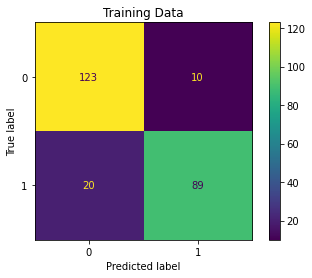

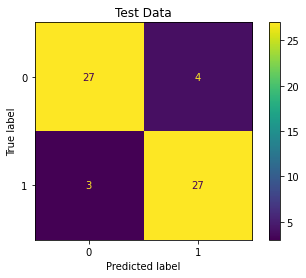

In [33]:
# Training model
model = LogisticRegression(random_state = 10).fit(train[features], train[target])

# Computing predictions
pred_train = model.predict(train[features])
pred_test = model.predict(test[features])

# Metrics
print("LOGISTIC REGRESSION")
print(50 * "*")
print("Training metrics:")
print(model_metrics(train[target], pred_train))
print(50 * "*")
print("Test metrics:")
print(model_metrics(test[target], pred_test))
print(50 * "*")

# Confusion matrix:
# Training Data
ConfusionMatrixDisplay.from_predictions(train[target], pred_train)
plt.title("Training Data")

# Test Data
ConfusionMatrixDisplay.from_predictions(test[target], pred_test)
plt.title("Test Data");

#### With GridSearchCV (Grid search with cross validation)

In [34]:
%%time

# Model
model_lr = LogisticRegression(random_state = 10)

# Parameters to test
params = {
    "solver": ["newton-cg", "lbfgs", "liblinear"],
    "max_iter": [5, 100, 200, 300],
    "class_weight": [None, "balanced"]
}

# Grid Search
# cv = cross validation = 5 means we have 5 subsets, 4 are run and 1 used 
grid_cv = GridSearchCV(model_lr, params, scoring = "recall", cv = 5, verbose = 1).fit(train[features], train[target])

# Best Model
print(f"Best parameters are {grid_cv.best_params_} with recall score of {grid_cv.best_score_}!")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters are {'class_weight': 'balanced', 'max_iter': 5, 'solver': 'lbfgs'} with recall score of 0.7883116883116884!
CPU times: user 471 ms, sys: 4.68 ms, total: 476 ms
Wall time: 475 ms


Let's try the hyperparameter optimization

LOGISTIC REGERSSION - GRIDSEARCHCV
**************************************************
Training metrics:
   Accuracy    Recall  Precision        F1
0  0.880165  0.877733   0.879856  0.878655
**************************************************
Test metrics:
   Accuracy    Recall  Precision        F1
0  0.885246  0.885484   0.885484  0.885246
**************************************************


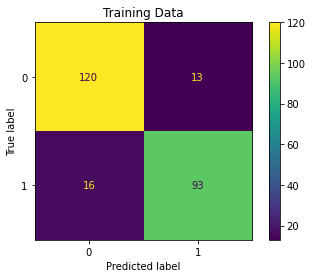

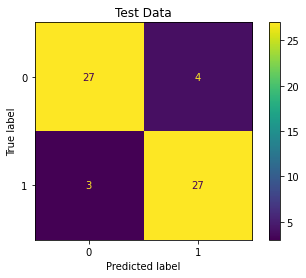

In [35]:
# Training model
model_lr_grid = LogisticRegression(
    class_weight = "balanced", 
    max_iter = 5, 
    solver = "lbfgs", 
    random_state = 10
).fit(train[features], train[target])

# Computing predictions
pred_train = model_lr_grid.predict(train[features])
pred_test = model_lr_grid.predict(test[features])

# Metrics
print('LOGISTIC REGERSSION - GRIDSEARCHCV')
print(50 * "*")
print("Training metrics:")
print(model_metrics(train[target], pred_train))
print(50 * "*")
print("Test metrics:")
print(model_metrics(test[target], pred_test))
print(50 * "*")

# Confusion matrix:
# Training Data
ConfusionMatrixDisplay.from_predictions(train[target], pred_train)
plt.title("Training Data")

# Test Data
ConfusionMatrixDisplay.from_predictions(test[target], pred_test)
plt.title("Test Data");

#### With Randomized Search:

In [36]:
%%time

# Model
model_lr = LogisticRegression(random_state = 10)

# Parameters to test
params = {
    "solver": ["newton-cg", "lbfgs", 'liblinear'],
    "max_iter": [5, 100, 200, 300],
    "class_weight": [None, "balanced"]
}

# Grid Search
grid_cv = RandomizedSearchCV(model_lr, params, scoring = "recall", cv = 5, verbose = 1).fit(train[features], train[target])

# Best Model
print(f"Best parameters are {grid_cv.best_params_} with recall score of {grid_cv.best_score_}!")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters are {'solver': 'lbfgs', 'max_iter': 100, 'class_weight': 'balanced'} with recall score of 0.7792207792207793!
CPU times: user 213 ms, sys: 5.94 ms, total: 219 ms
Wall time: 218 ms


Retraining with Randomized search results:

LOGISTIC REGRESSION - RANDOMIZED SEARCH
**************************************************
Training metrics:
   Accuracy    Recall  Precision        F1
0  0.880165  0.876078   0.881793  0.878166
**************************************************
Test metrics:
   Accuracy    Recall  Precision        F1
0  0.885246  0.885484   0.885484  0.885246
**************************************************


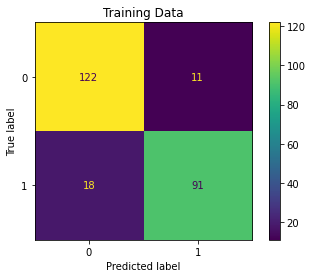

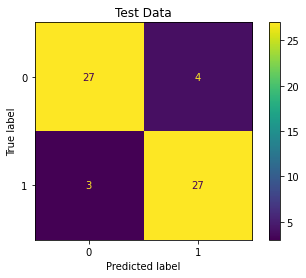

In [37]:
# Training model
model_lr_rand = LogisticRegression(
    class_weight = "balanced", 
    max_iter = 100, 
    solver = "lbfgs", 
    random_state = 10
).fit(train[features], train[target])

# Computing predictions
pred_train = model_lr_rand.predict(train[features])
pred_test = model_lr_rand.predict(test[features])

# Metrics
print('LOGISTIC REGRESSION - RANDOMIZED SEARCH')
print(50 * "*")
print("Training metrics:")
print(model_metrics(train[target], pred_train))
print(50 * "*")
print("Test metrics:")
print(model_metrics(test[target], pred_test))
print(50 * "*")

# Confusion matrix:
# Training Data
ConfusionMatrixDisplay.from_predictions(train[target], pred_train)
plt.title("Training Data")

# Test Data
ConfusionMatrixDisplay.from_predictions(test[target], pred_test)
plt.title("Test Data");

**Need to balanace when doing the split test, train??**

In another file I have tried the stratify = data['num'] command in the train tst split, however, this will only translate in having the same imbalance of classes as the target into the train and test sets.
During the search of best parameters we have used a classified_weight = balanced so that should account for the small difference in the target column between classes. 

### Decision Tree

In [77]:
# Set the chosen model
dt_model = DecisionTreeClassifier(max_depth = 1, min_samples_split = 5, random_state = 666).fit(train[features], train[target])

Decision tree predictions, metrics, and confusion matrix:

DECISION TREE
Training metrics
   Accuracy    Recall  Precision        F1
0  0.747934  0.738394   0.750435  0.740485
------------------------------------------------------------
Test metrics
   Accuracy    Recall  Precision        F1
0  0.721311  0.719892   0.727222  0.718589


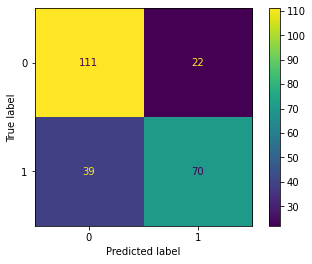

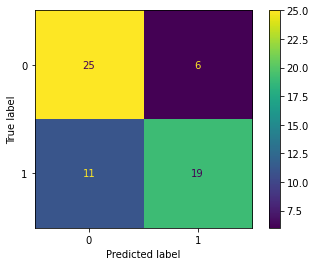

In [78]:
dt_pred_train = dt_model.predict(train[features])
dt_pred_test = dt_model.predict(test[features])

metrics_dt_train = model_metrics(train[target], dt_pred_train)
metrics_dt_test = model_metrics(test[target], dt_pred_test)

print('DECISION TREE')
print("Training metrics")
print(metrics_dt_train)
print('---'*20)
print("Test metrics")
print(metrics_dt_test)

ConfusionMatrixDisplay.from_predictions(train[target], dt_pred_train)
ConfusionMatrixDisplay.from_predictions(test[target], dt_pred_test)

Since the result for the test set is much worse than for the train set, looks like we are overfitting.
Indeed our recall metric is not great, and the confusion matrix ilustrates the problem. 

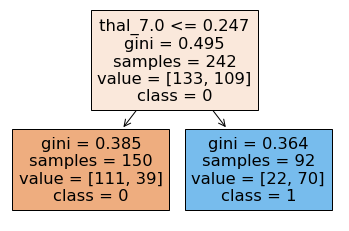

In [79]:
plot_tree(dt_model, feature_names = features, filled = True, class_names = ["0",'1']);

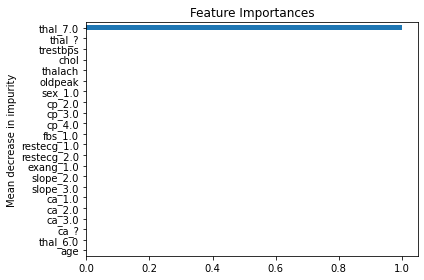

In [80]:
tree_importances = pd.Series(dt_model.feature_importances_, index = features)

fig, ax = plt.subplots()
tree_importances.sort_values(ascending = True).plot.barh(ax = ax)

ax.set_title("Feature Importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

* STILL OVERFITTING! WITH RF must do prunning or smaller trees*

### Random Forest

Default Model:

RANDOM FOREST
**************************************************
Training metrics:
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
**************************************************
Test metrics:
   Accuracy    Recall  Precision        F1
0  0.836066  0.835484   0.837662  0.835668
**************************************************


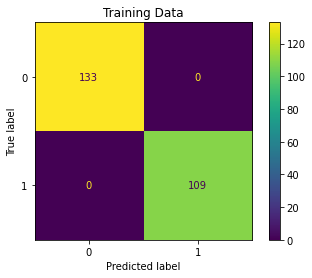

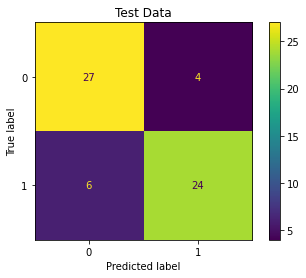

In [81]:
# Training model
model_rf = RandomForestClassifier(random_state = 10).fit(train[features], train[target])

# Computing predictions
pred_train = model_rf.predict(train[features])
pred_test = model_rf.predict(test[features])

# Metrics
print('RANDOM FOREST')
print(50 * "*")
print("Training metrics:")
print(model_metrics(train[target], pred_train))
print(50 * "*")
print("Test metrics:")
print(model_metrics(test[target], pred_test))
print(50 * "*")

# Confusion matrix:
# Training Data
ConfusionMatrixDisplay.from_predictions(train[target], pred_train)
plt.title("Training Data")

# Test Data
ConfusionMatrixDisplay.from_predictions(test[target], pred_test)
plt.title("Test Data");

Grid Search for Random Forest:

In [105]:
%%time

# Model
model_rf = RandomForestClassifier(random_state = 10)

# Parameters to test
params = {
    "max_depth": np.arange(2, 20, 2),
    "n_estimators": [10, 100],
    #"n_estimators": [100, 200, 300, 400],
    #"n_estimators": [50, 500, 50],
    "class_weight": [None, "balanced"],
    "criterion": ["gini", "entropy"]
}

# Grid Search
grid_cv = GridSearchCV(model_rf, params, scoring = "recall", cv = 5, verbose = 1).fit(train[features], train[target])

# Best Model
print(f"Best parameters are {grid_cv.best_params_} with recall score of {grid_cv.best_score_}!")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters are {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 4, 'n_estimators': 100} with recall score of 0.8069264069264068!
CPU times: user 15.9 s, sys: 219 ms, total: 16.1 s
Wall time: 16.2 s


Retraining Random Forest with best parameters

RANDOM FOREST WITH GRID SEARCH:
**************************************************
Training metrics:
   Accuracy    Recall  Precision        F1
0  0.871901  0.869387   0.871462  0.870286
**************************************************
Test metrics:
   Accuracy    Recall  Precision        F1
0  0.754098  0.754301   0.754301  0.754098
**************************************************


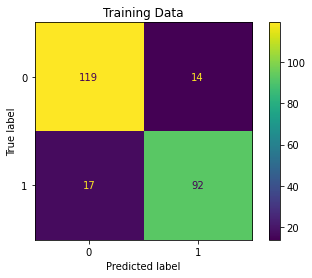

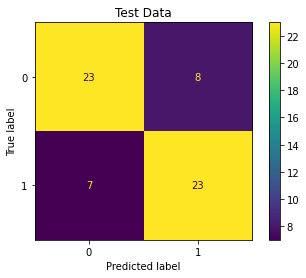

In [92]:
# Training model
model_rf_grid = RandomForestClassifier(
    max_depth = 2,
    n_estimators = 100,
    criterion = "gini",
    class_weight = "balanced",
    random_state = 10
).fit(train[features], train[target])

# Computing predictions
pred_train = model_rf_grid.predict(train[features])
pred_test = model_rf_grid.predict(test[features])

# Metrics
print('RANDOM FOREST WITH GRID SEARCH:')
print(50 * "*")
print("Training metrics:")
print(model_metrics(train[target], pred_train))
print(50 * "*")
print("Test metrics:")
print(model_metrics(test[target], pred_test))
print(50 * "*")

# Confusion matrix:
# Training Data
ConfusionMatrixDisplay.from_predictions(train[target], pred_train)
plt.title("Training Data")

# Test Data
ConfusionMatrixDisplay.from_predictions(test[target], pred_test)
plt.title("Test Data");

With RandomizedSearchCV

In [103]:
%%time

# Model
model_rf = RandomForestClassifier(random_state = 10)

# Parameters to test
params = {
    "max_depth": np.arange(2, 20, 2),
    "n_estimators": [10,100, 200, 300],
    "class_weight": [None, "balanced"],
    "criterion": ["gini", "entropy"]
}

# Grid Search
grid_cv = RandomizedSearchCV(model_rf, params, scoring = "recall", cv = 5, n_iter = 10, verbose = 1).fit(train[features], train[target])

# Best Model
print(f"Best parameters are {grid_cv.best_params_} with recall score of {grid_cv.best_score_}!")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters are {'n_estimators': 300, 'max_depth': 4, 'criterion': 'entropy', 'class_weight': 'balanced'} with recall score of 0.8069264069264068!
CPU times: user 6.55 s, sys: 51.4 ms, total: 6.6 s
Wall time: 6.6 s


Retraining with best parameters from RandomizedSearchCV

RANDOM FOREST - RANDOMIED SEARCH CV
**************************************************
Training metrics:
   Accuracy    Recall  Precision       F1
0  0.896694  0.895254   0.895937  0.89558
**************************************************
Test metrics:
   Accuracy    Recall  Precision        F1
0  0.786885  0.786022    0.78976  0.785965
**************************************************


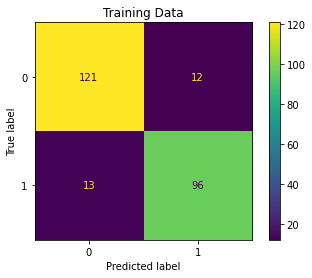

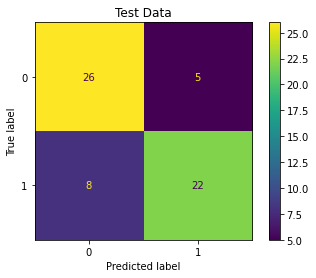

In [104]:
# Training model
model_rf_rand = RandomForestClassifier(
    max_depth = 4,
    n_estimators = 300,
    criterion = "entropy",
    class_weight = 'balanced',
    random_state = 10
).fit(train[features], train[target])

# Computing predictions
pred_train = model_rf_rand.predict(train[features])
pred_test = model_rf_rand.predict(test[features])

# Metrics
print('RANDOM FOREST - RANDOMIED SEARCH CV')
print(50 * "*")
print("Training metrics:")
print(model_metrics(train[target], pred_train))
print(50 * "*")
print("Test metrics:")
print(model_metrics(test[target], pred_test))
print(50 * "*")

# Confusion matrix:
# Training Data
ConfusionMatrixDisplay.from_predictions(train[target], pred_train)
plt.title("Training Data")

# Test Data
ConfusionMatrixDisplay.from_predictions(test[target], pred_test)
plt.title("Test Data");

* STILL OVERFITTING! WITH RF must do prunning or smaller trees*

<AxesSubplot:xlabel='Imp'>

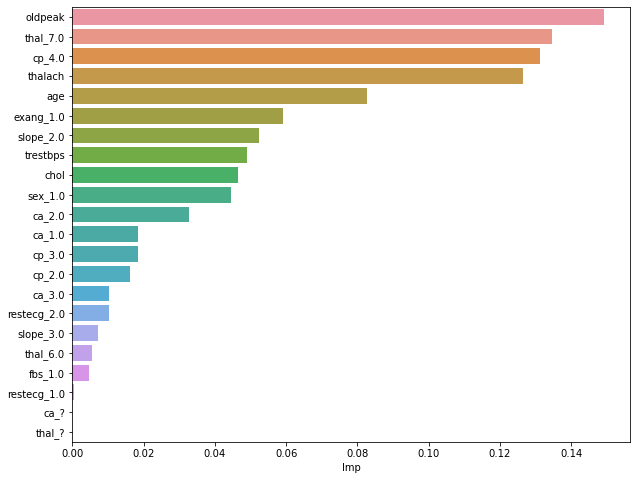

In [106]:
# Plot importance:

imp_rf = pd.DataFrame(model_rf_rand.feature_importances_, index = features, columns = ["Imp"])
imp_rf = imp_rf.sort_values("Imp", ascending = False)

plt.figure(figsize = (10,8))
sns.barplot(y = imp_rf.index, x = imp_rf.Imp)

### Gradient Boosting

We use the XGBClassifier from the XGBoost package.

In [107]:
import xgboost as xgb
xgb.__version__

'1.6.1'

Defautl model:

Gradient Boosting
**************************************************
Training metrics:
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
**************************************************
Test metrics:
   Accuracy    Recall  Precision        F1
0  0.819672  0.819355   0.820043  0.819478
**************************************************


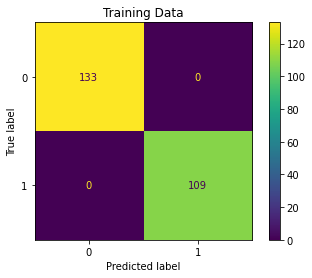

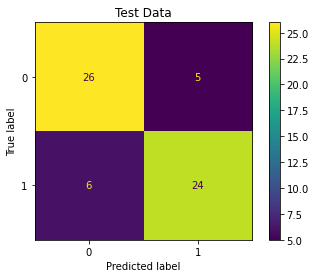

In [110]:
# Training model
model_xgb = XGBClassifier(random_state = 10).fit(train[features], train[target])

# Computing predictions
pred_train = model_xgb.predict(train[features])
pred_test = model_xgb.predict(test[features])

# Metrics
print('Gradient Boosting')
print(50 * "*")
print("Training metrics:")
print(model_metrics(train[target], pred_train))
print(50 * "*")
print("Test metrics:")
print(model_metrics(test[target], pred_test))
print(50 * "*")

# Confusion matrix:
# Training Data
ConfusionMatrixDisplay.from_predictions(train[target], pred_train)
plt.title("Training Data")

# Test Data
ConfusionMatrixDisplay.from_predictions(test[target], pred_test)
plt.title("Test Data");

Grid Search

In [111]:
%%time

# Model
model_xgb = XGBClassifier(random_state = 10)

# Parameters to test
params = {
    "max_depth": np.arange(2, 20, 2),
    "n_estimators": np.arange(50, 500, 50)
}

# Grid Search
grid_cv = GridSearchCV(model_xgb, params, scoring = "recall", cv = 5, verbose = 1).fit(train[features], train[target])

# Best Model
print(f"Best parameters are {grid_cv.best_params_} with recall score of {grid_cv.best_score_}!")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters are {'max_depth': 4, 'n_estimators': 250} with recall score of 0.7705627705627706!
CPU times: user 3min 46s, sys: 48.3 s, total: 4min 35s
Wall time: 42.7 s


Retraining with best parameters from grid search

Gradient Boosting - Grid search
**************************************************
Training metrics:
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
**************************************************
Test metrics:
   Accuracy    Recall  Precision        F1
0  0.786885  0.786559   0.787177  0.786656
**************************************************


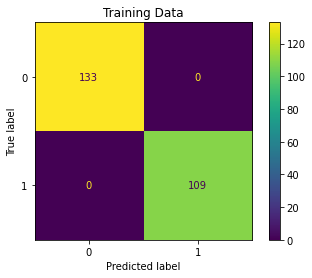

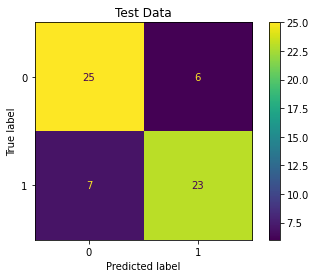

In [112]:
# Training model
model_xgb_grid = XGBClassifier(
    max_depth = 4,
    n_estimators = 250,
    random_state = 10
).fit(train[features], train[target])

# Computing predictions
pred_train = model_xgb_grid.predict(train[features])
pred_test = model_xgb_grid.predict(test[features])

# Metrics
print('Gradient Boosting - Grid search')
print(50 * "*")
print("Training metrics:")
print(model_metrics(train[target], pred_train))
print(50 * "*")
print("Test metrics:")
print(model_metrics(test[target], pred_test))
print(50 * "*")

# Confusion matrix:
# Training Data
ConfusionMatrixDisplay.from_predictions(train[target], pred_train)
plt.title("Training Data")

# Test Data
ConfusionMatrixDisplay.from_predictions(test[target], pred_test)
plt.title("Test Data");

With RandomizedSeachCV

In [113]:
%%time

# Model
model_xgb = XGBClassifier(random_state = 10)

# Parameters to test
params = {
    "max_depth": np.arange(2, 20, 2),
    "n_estimators": np.arange(50, 500, 50)
}

# Grid Search
grid_cv = RandomizedSearchCV(model_xgb, params, scoring = "recall", cv = 5, n_iter = 10).fit(train[features], train[target])

# Best Model
print(f"Best parameters are {grid_cv.best_params_} with recall score of {grid_cv.best_score_}!")

Best parameters are {'n_estimators': 250, 'max_depth': 4} with recall score of 0.7705627705627706!
CPU times: user 24.7 s, sys: 4.65 s, total: 29.3 s
Wall time: 4.24 s


Now retraining with best parameters: 

In [ ]:
# Training model
model_xgb_rand = XGBClassifier(
    max_depth = 4,
    n_estimators = 250,
    random_state = 10
).fit(train[features], train[target])

# Computing predictions
pred_train = model_xgb_rand.predict(train[features])
pred_test = model_xgb_rand.predict(test[features])

# Metrics
print('Gradient Boosting - RandomizedSearchCV')
print(50 * "*")
print("Training metrics:")
print(model_metrics(train[target], pred_train))
print(50 * "*")
print("Test metrics:")
print(model_metrics(test[target], pred_test))
print(50 * "*")

# Confusion matrix:
# Training Data
ConfusionMatrixDisplay.from_predictions(train[target], pred_train)
plt.title("Training Data")

# Test Data
ConfusionMatrixDisplay.from_predictions(test[target], pred_test)
plt.title("Test Data");

Feature importance

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (15, 12))
plot_importance(model_xgb_rand, height = 0.8, ax = ax)

### Neural Networks

In [ ]:
# Training model
model_mlp = MLPClassifier(
    hidden_layer_sizes = (64, 64, 64, 64), 
    solver = "lbfgs",
    max_iter = 500,
    random_state = 666
).fit(train[features], train[target])

# Computing predictions
mlp_pred_train = model_mlp.predict(train[features])
mlp_pred_test = model_mlp.predict(test[features])

# Metrics
print('Neural Networks')
print(50 * "*")
print("Training metrics:")
print(model_metrics(train[target], mlp_pred_train))
print(50 * "*")
print("Test metrics:")
print(model_metrics(test[target], mlp_pred_test))
print(50 * "*")

In [ ]:
# Confusion matrix:
# Training Data
ConfusionMatrixDisplay.from_predictions(train[target], mlp_pred_train)
plt.title("Training Data")

# Test Data
ConfusionMatrixDisplay.from_predictions(test[target], mlp_pred_test)
plt.title("Test Data");

### k-NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#knn = KNeighborsClassifier(n_neighbors = 10)

In [ ]:
#knn.fit(features, target)

# Training model
model_knn = KNeighborsClassifier(
    n_neighbors = 19
).fit(train[features], train[target])

# Computing predictions
knn_pred_train = model_knn.predict(train[features])
knn_pred_test = model_knn.predict(test[features])

# Metrics
print('k-NN')
print(50 * "*")
print("Training metrics:")
print(model_metrics(train[target], knn_pred_train))
print(50 * "*")
print("Test metrics:")
print(model_metrics(test[target], knn_pred_test))
print(50 * "*")

### Clustering

Since the data has already been standarized, this step won't be done here.

### K-Means

Let's assume there are 2 clusters, the patients that will be diagnosed positive and the ones who will not. 

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering

# To visualize the elbow curve
from yellowbrick.cluster import kelbow_visualizer

In [ ]:
data3 = data2.copy()
data3.head()

In [ ]:
data3 = data3.select_dtypes(include = ["int64", "float64"])
target = "num"
features = list(data3.drop(target, axis = 1))
print(features)

In [ ]:
#data3.drop(["num"], axis = 1, inplace = True)
#data3.head()
#type(data3)

sns.countplot(data = data3, x = target)

#### Bivariate Analysis

In [ ]:
ncols = 2
nrows = np.ceil(len(features)).astype("int64")

plt.figure(figsize = (12, 4 * nrows))

for i, col in enumerate(features):
    plt.subplot(nrows, ncols, i + 1)
    sns.boxplot(data = data3, x = target, y = col)
    plt.title(col + " vs Target")
    plt.tight_layout()
plt.show();

Looking at the scatter plot

In [ ]:
sns.scatterplot(data = data3, x = "age", y = "oldpeak", hue = target)

In [ ]:
sns.scatterplot(data = data3, x = "age", y = "thalach", hue = target)

### Standarization

In [ ]:
# Meta-data
features = list(data3.drop(target, axis = 1))
target = "num"

# Z-score
data3 = StandardScaler().fit_transform(data3.drop(target, axis = 1))
data3 = pd.DataFrame(data3, columns = features)
data3["num"] = data2["num"]
data3

In [ ]:
model_kmeans_1 = KMeans(n_clusters = 2, random_state = 10).fit(data3[features])

In [ ]:
model_kmeans_1.labels_


In [ ]:
data3["cluster-kmeans-2"] = pd.Categorical(model_kmeans_1.labels_)
data3

Let's plot it to see how it is clustered

In [ ]:
# Figure canvas
fig, ax = plt.subplots(ncols = 2, nrows = 1, sharey = True, figsize = (15, 6))

# Plotting original classes
#sns.scatterplot(data = data2, x = "petal length (cm)", y = "petal width (cm)", hue = target, ax = ax[0])
sns.scatterplot(data = data3, x  = 'trestbps', y = 'thalach', hue = target, ax = ax[0])

# Plotting clusters
#sns.scatterplot(data = data, x = "petal length (cm)", y = "petal width (cm)", hue = "cluster-kmeans-3", ax = ax[1]);
sns.scatterplot(data = data3, x = "trestbps", y = "thalach", hue = target, ax = ax[1]);

Let's use the elbow method to make sure that 2 is the optimal number of clusters:

In [ ]:
plt.figure(figsize = (10,6))
kelbow_visualizer(model_kmeans_1, X = data3[features], y = data3[target]);

The elbow method is suggesting 5 clusters, let's try it

In [ ]:
# Training model
model_kmeans_2 = KMeans(n_clusters = 5, random_state = 10).fit(data3[features])

# Plotting clusters
data3["cluster-kmeans-5"] = pd.Categorical(model_kmeans_2.labels_)

fig, ax = plt.subplots(ncols = 2, nrows = 1, sharey = True, figsize = (15, 6))
sns.scatterplot(data = data3, x = "trestbps", y = "thalach", hue = target, ax = ax[0])
sns.scatterplot(data = data3, x = "trestbps", y = "thalach", hue = "cluster-kmeans-5", ax = ax[1]);